<a href="https://colab.research.google.com/github/DreamWalker1412/Colab/blob/main/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

导入keras版本

Keras是一个高层神经网络API，为支持快速实验而生，能够把你的idea迅速转换为结果。

In [ ]:
%tensorflow_version 1.x
import keras
print(keras.__version__)

TensorFlow 1.x selected.


Using TensorFlow backend.


2.3.1


1.1 选择模型<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.utils import get_file, to_categorical
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=784, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


2 读取数据集

In [ ]:
path = get_file('mnist.npz',origin='https://s3.amazonaws.com/img-datasets/mnist.npz'
    ,file_hash='8a61469f7ea1b51cbae51d4f78837e45')
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

11493376/11490434 [==============================] - 0s 0us/step


检查数据

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


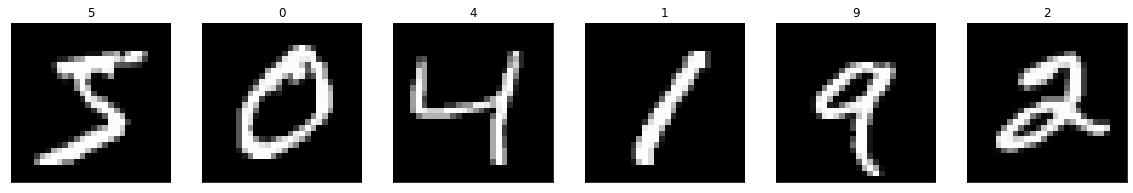

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# 可视化查看一下
fig = plt.figure(figsize = (20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6,i + 1, xticks = [], yticks = [])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

In [ ]:
# 归一化
x_train=x_train / 255
x_test=x_test / 255

x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

3 训练

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.5951 - accuracy: 0.8565
Epoch 2/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.3173 - accuracy: 0.9121
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2694 - accuracy: 0.9252
Epoch 4/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2389 - accuracy: 0.9335
Epoch 5/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.2157 - accuracy: 0.9402


In [ ]:
score = model.evaluate(x_test,y_test,batch_size=128)
print("loss:",score[0])
print("accuracy:",score[1])

10000/10000 [==============================] - 0s 25us/step
loss: 0.20205275551080704
accuracy: 0.9424999952316284


4 预测

In [ ]:
model.predict_classes(x_test,batch_size=128)

array([7, 2, 1, ..., 4, 5, 6])

5 保存模型参数为JSON文件

In [ ]:
model_json = model.to_json()
json_file = open("model.json", "w")
json_file.write(model_json)
json_file.close()
# 保存权重
model.save_weights("model.weights")

6 从文件中读取模型及参数



In [ ]:
from keras.models import model_from_json
# 读取模型
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# 读取权重
loaded_model.load_weights("model.weights")


# 使用之前记得要编译一下
loaded_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 预测
loaded_model.predict_classes(x_test,batch_size=128)
score_loaded_model = loaded_model.evaluate(x_test,y_test,batch_size=128)
print("loss:",score_loaded_model[0])
print("accuracy:",score_loaded_model[1])

10000/10000 [==============================] - 0s 24us/step
loss: 0.20205275551080704
accuracy: 0.9424999952316284


7. RNN测试

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import os

mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

n_inputs = 28
max_time = 28
lstm_size = 100
n_classes = 10
batch_size =50
n_batch = mnist.train.num_examples//batch_size

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

weights = tf.Variable(tf.truncated_normal([lstm_size,n_classes],stddev=0.1))
biases = tf.Variable(tf.constant(0.1,shape=[n_classes]))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

定义RNN(LSTM)网络

In [ ]:
from tensorflow.contrib import rnn

def RNN(X, weights, biases):
  inputs = tf.reshape(X,[-1,max_time,n_inputs])
  lstm_cell = rnn.BasicLSTMCell(lstm_size)
  outputs,final_state = tf.nn.dynamic_rnn(lstm_cell,inputs,dtype=tf.float32)
  print('shape(outputs): ',outputs)
  print('shape(final_state: ',outputs)
  results = tf.nn.softmax(tf.matmul(final_state[1],weights)+biases)
  return results


计算评估结果

In [ ]:
prediction = RNN(x,weights,biases)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prediction))
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
crroect_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(crroect_prediction,tf.float32))

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
shape(outputs):  Tensor("rnn/transpose_1:0", shape=(?, 28, 100), dtype=float32)
shape(final_state:  Tensor("rnn/transpose_1:0", shape=(?, 28, 100), dtype=float32)


开始训练模型

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(10):
    for batch in range(n_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_op,feed_dict={x: batch_xs, y: batch_ys})
    acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print('Iter '+str(epoch)+', Testing Accuracy='+str(acc))

Iter 0, Testing Accuracy=0.7237
Iter 1, Testing Accuracy=0.8552
Iter 2, Testing Accuracy=0.8795
Iter 3, Testing Accuracy=0.9078
Iter 4, Testing Accuracy=0.9153
Iter 5, Testing Accuracy=0.9286
Iter 6, Testing Accuracy=0.9318
Iter 7, Testing Accuracy=0.9389
Iter 8, Testing Accuracy=0.9433
Iter 9, Testing Accuracy=0.9428
